<a href="https://colab.research.google.com/github/MathGrecco/Trabalho_Analise_De_Dados/blob/main/Trabalho_An%C3%A1lise_De_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

pd.options.display.max_columns = None


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import iplot


test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train-1.csv")

In [16]:
# verificando as dimensões do DataFrame

print("Variáveis:\t{}\nEntradas:\t{}".format(train_df.shape[1], train_df.shape[0]))

Variáveis:	12
Entradas:	891


In [18]:
# identificar o tipo de cada variável
display(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
#Vamos analisar agora o banco de dados das 10 primeiras linhas para verificar se temos alguma inconsistência.

train_df.head(10)

#Analisando os dados, algumas coisas chamam atenção. Uma delas é que existem muitos dados que precisam ser convertidos para numericos,
#(isso para podermos usar esses dados nos algoritmos de ML), como por exemplo o Sexo dos passageiros e a cidade de onde embarcaram.
#Tambem existem valores que estão em escalas muito diferentes (precisamos converter para uma escalar mais aproximada, normalizar).
#Além disso, percebemos colunas que contem vários 'NaN' (Not a Number)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
train_df.isnull().sum()

#As colunas com valores nulos são: Age, Cabin e Embarked;

#Essa tabela indica que na coluna cabine existem 687 dados faltantes, na Idade não possui dados de 177 pessoas, e 2 pessoas não embarcaram.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# ver a porcentagem valores faltantes
(train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending=False)

#A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%.
#Após, a coluna Age não possui valor em quase 20% dos passageiros.
#Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [62]:
train_df.describe()

#Vamos aplicar um resumo das informações.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


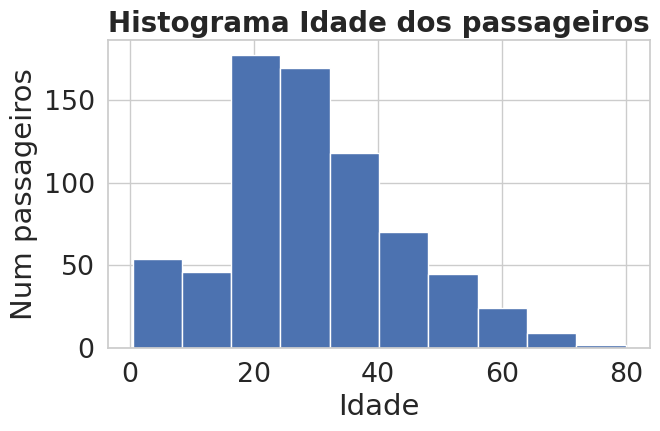

In [65]:
# Tamanho
plt.figure( figsize=(7, 4) )

#Titulo do grafico
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')

plt.hist(train_df.Age)
plt.xlabel('Idade')
plt.ylabel('Num passageiros')
plt.savefig('histograma_idade.png')

#Mostrar o histograma
plt.show()

#O gráfico mostra que o maior valume de passageiros estava entre 20 a 40 anos.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

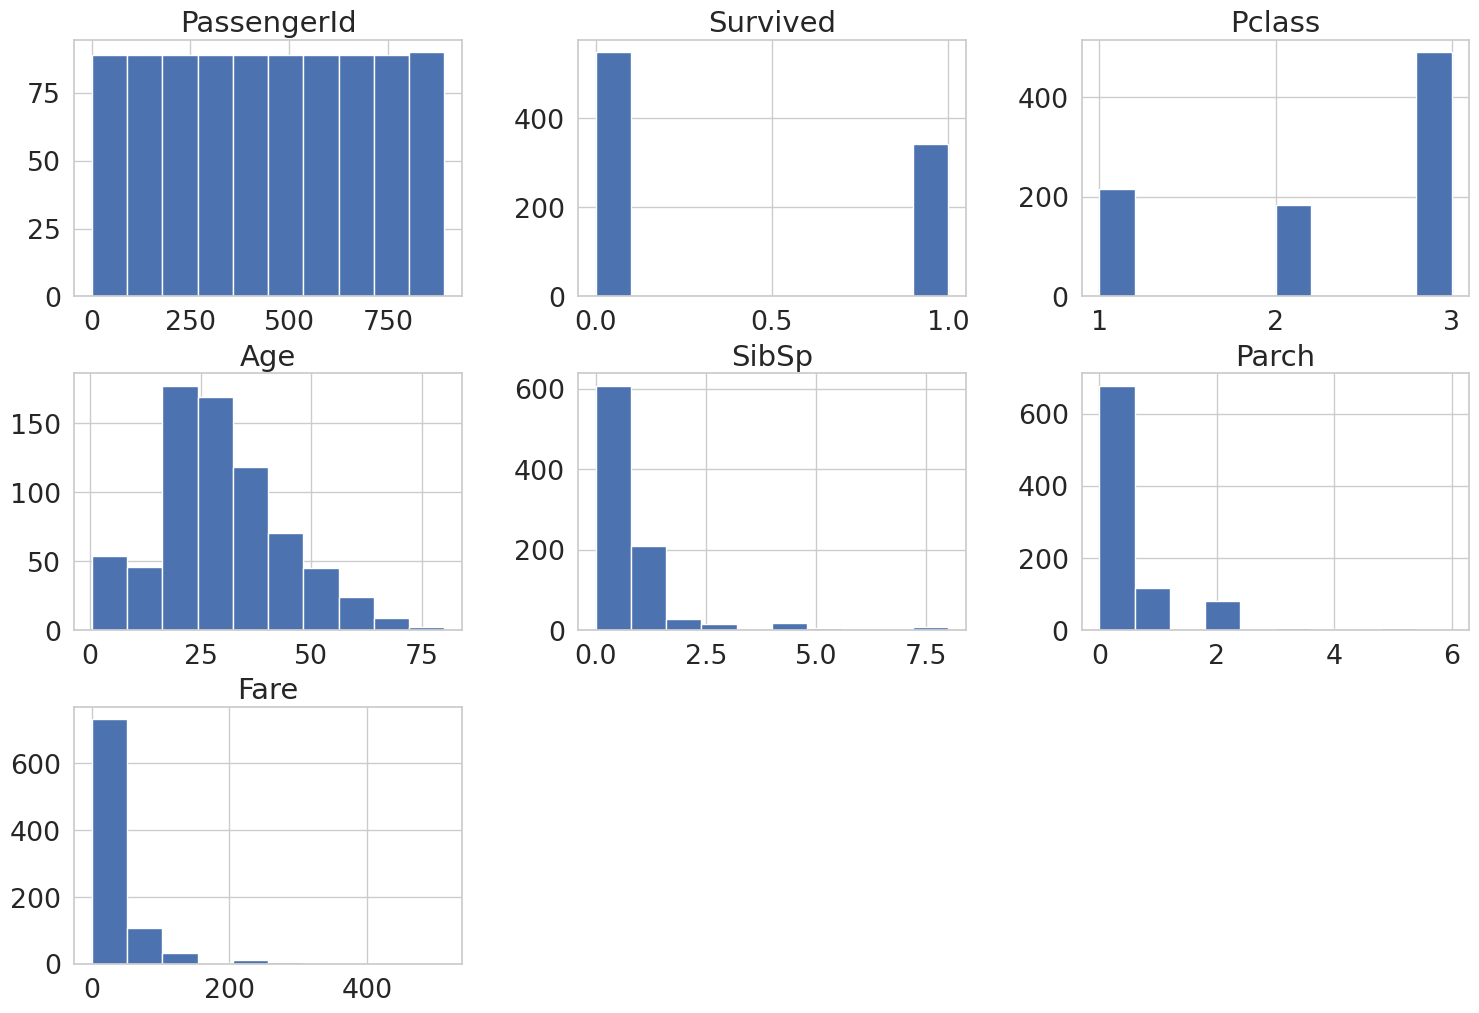

In [66]:
#verificando o historgrama das variáveis numericas

train_df.hist(figsize=(18,12))

In [67]:
# Analisar a probabilidade de sobrevivência pelo Sexo

train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


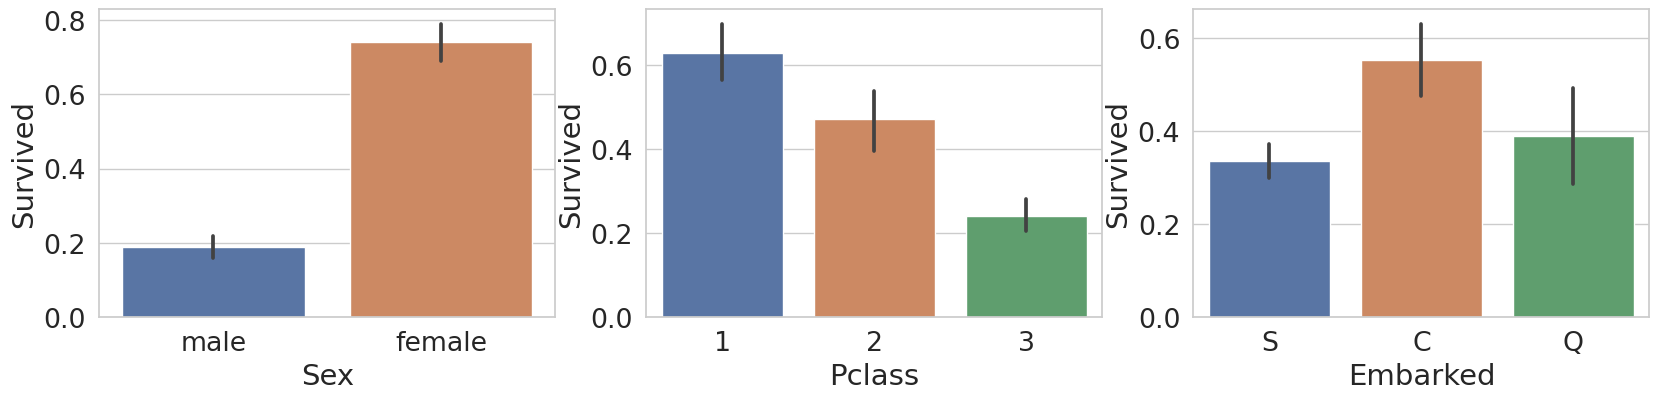

In [68]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(20,4))

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3);

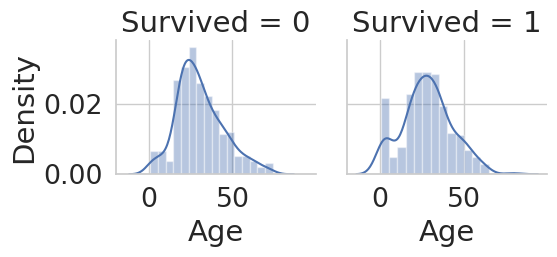

In [69]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.distplot, 'Age')

In [70]:
train_df.describe(include=['O'])
#Os valores para Name são únicos, um para cada pessoa;
#Não há missing values para Name e Sex;
#Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
#O Porto no qual embarcaram mais passageiros é o de S = Southampton.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [71]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train_df.shape[0]
test_idx = test_df.shape[0]

# salvar PassengerId
passengerId = test_df['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train_df.Survived.copy()
train_df.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [72]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [73]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [74]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)                                                            #Amostragem e Probabilidade:

In [75]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

#Abaixo foram convertidos os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito de variáveis dummies.

#As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica.

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [76]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [78]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [79]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

In [80]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [81]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

In [85]:
# declarar os valores das variáveis para mim e minha esposa
matheus_grecco = np.array([2, 0, 35, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
Ana = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Matheus Grecco:\t{}".format(tree_model.predict(matheus_grecco)[0]))
print("Ana:\t{}".format(tree_model.predict(Ana)[0]))

Matheus Grecco:	0
Ana:	1
